## Covid_19 Global Data Analysis Project
Prepared By: Ejaz-ur-Rehman\
Date: 22-04-2025\
Email ID: ijazfinance@gmail.com

- I have taken three datasets regarding Covid_19_Global:
  - Confirmed
  - Deaths
  - Recovered

In [5]:
# import necessary libraries
pip install pandas


SyntaxError: invalid syntax (1054162606.py, line 2)

In [4]:
import pandas as pd

In [7]:
# Load the datasets
confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')   # replace with actual file name
deaths = pd.read_csv('time_series_covid19_deaths_global.csv')         # replace with actual file name
recovered = pd.read_csv('time_series_covid19_recovered_global.csv')   # replace with actual file name



In [8]:
# Add a Label to Each File Before Merging
confirmed_long = confirmed.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                                var_name='Date', value_name='Confirmed')

deaths_long = deaths.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                          var_name='Date', value_name='Deaths')

recovered_long = recovered.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                                var_name='Date', value_name='Recovered')


In [9]:
# Merge All Three DataFrames
# Merge confirmed and deaths
merged_df = pd.merge(confirmed_long, deaths_long, 
                     on=['Province/State', 'Country/Region', 'Lat', 'Long', 'Date'])

# Merge with recovered
merged_df = pd.merge(merged_df, recovered_long, 
                     on=['Province/State', 'Country/Region', 'Lat', 'Long', 'Date'])


In [10]:
# Convert Date Column to Proper Datetime Format
merged_df['Date'] = pd.to_datetime(merged_df['Date'])


C:\Users\DELL\AppData\Local\Temp\ipykernel_22560\2827545715.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_df['Date'] = pd.to_datetime(merged_df['Date'])


In [11]:
print(merged_df.head())  # Shows the first 5 rows by default


  Province/State Country/Region       Lat       Long       Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953 2020-01-22          0   
1            NaN        Albania  41.15330  20.168300 2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600 2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800 2020-01-22          0   
4            NaN         Angola -11.20270  17.873900 2020-01-22          0   

   Deaths  Recovered  
0       0          0  
1       0          0  
2       0          0  
3       0          0  
4       0          0  


2. EDA for the Merged Dataset

In [12]:
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306324 entries, 0 to 306323
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Province/State  83439 non-null   object        
 1   Country/Region  306324 non-null  object        
 2   Lat             305181 non-null  float64       
 3   Long            305181 non-null  float64       
 4   Date            306324 non-null  datetime64[ns]
 5   Confirmed       306324 non-null  int64         
 6   Deaths          306324 non-null  int64         
 7   Recovered       306324 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 18.7+ MB


In [13]:
# merged_df.isnull().sum()
# Check for missing values in the merged DataFrame

In [14]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


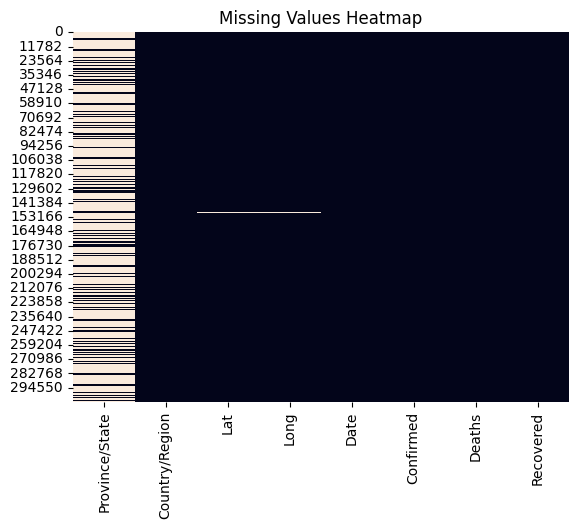

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(merged_df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


In [16]:
# Descriptive Statistics
merged_df.describe()


,Lat,Long,Date,Confirmed,Deaths,Recovered
count,305181.000000,305181.000000,306324,3.063240e+05,3.063240e+05,3.063240e+05
mean,18.223632,26.732461,2021-08-15 00:00:00.000000256,1.026556e+06,1.431809e+04,7.576556e+04
min,-71.949900,-178.116500,2020-01-22 00:00:00,0.000000e+00,0.000000e+00,-1.000000e+00
25%,3.919300,-10.940800,2020-11-02 00:00:00,7.420000e+02,3.000000e+00,0.000000e+00
50%,18.971200,22.937500,2021-08-15 00:00:00,1.555400e+04,1.640000e+02,0.000000e+00
75%,39.305400,95.956000,2022-05-28 00:00:00,2.550640e+05,3.320000e+03,9.340000e+02
max,71.706900,178.065000,2023-03-09 00:00:00,1.038027e+08,1.123836e+06,3.097475e+07
std,25.353682,75.431165,NaN,5.046434e+06,6.625020e+04,7.111505e+05


In [17]:
# Total Cases Summary by Date
total_by_date = merged_df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum()
print(total_by_date.tail())


            Confirmed   Deaths  Recovered
Date                                     
2023-03-05  671087927  6820620          0
2023-03-06  671144290  6820949          0
2023-03-07  671273820  6821859          0
2023-03-08  671452430  6823275          0
2023-03-09  671625714  6824508          0


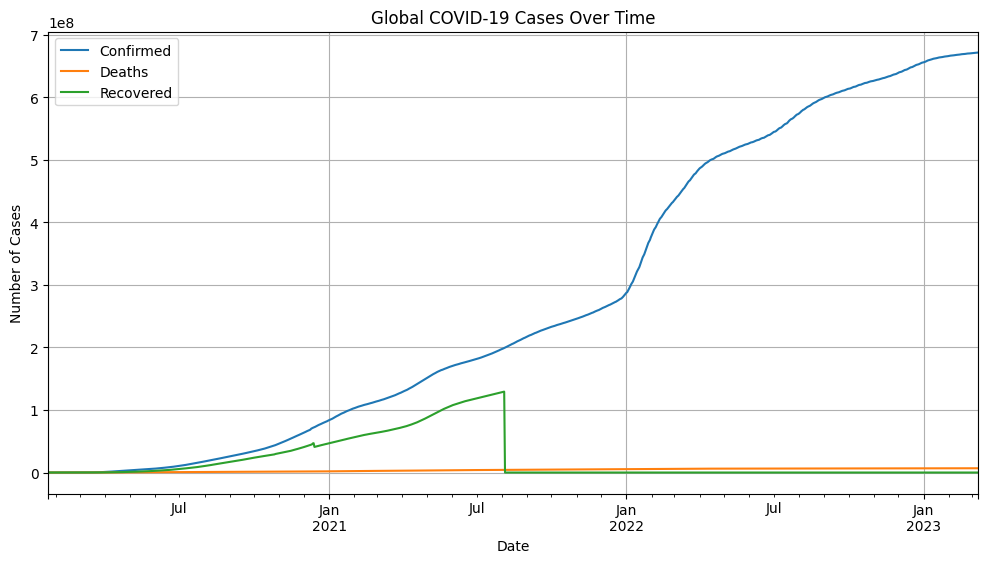

In [18]:
# Plot Total Trends Over Time
total_by_date.plot(figsize=(12, 6))
plt.title("Global COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.grid(True)
plt.show()


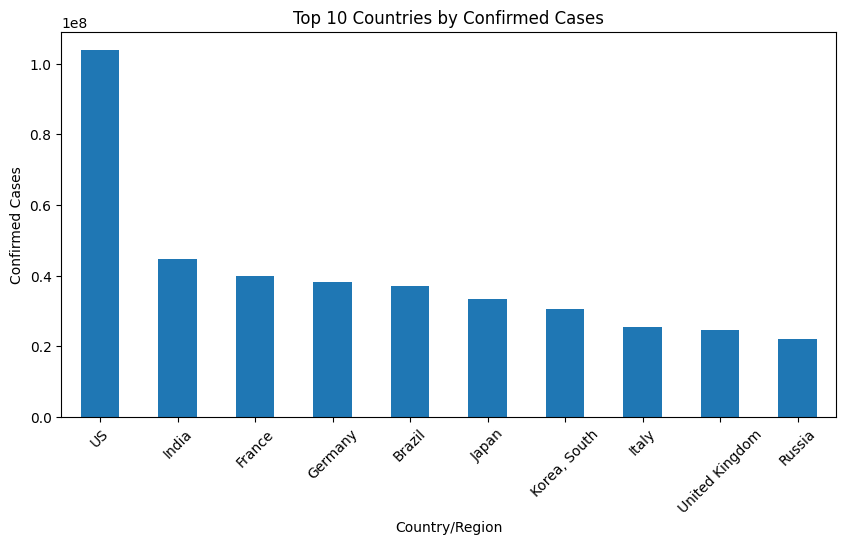

In [19]:
# Top 10 Countries by Total Confirmed Cases
latest = merged_df[merged_df['Date'] == merged_df['Date'].max()]
top_countries = latest.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(10)

top_countries.plot(kind='bar', figsize=(10, 5))
plt.title("Top 10 Countries by Confirmed Cases")
plt.ylabel("Confirmed Cases")
plt.xticks(rotation=45)
plt.show()


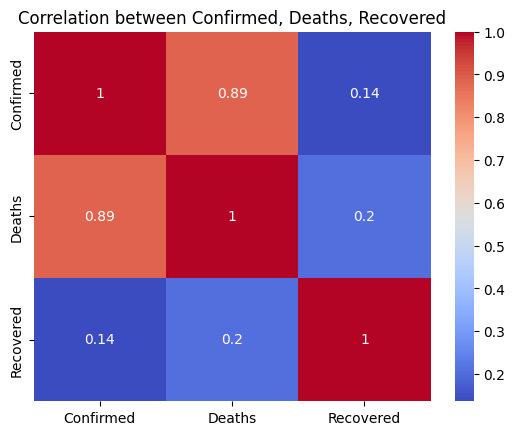

In [20]:
# Correlation Matrix
sns.heatmap(merged_df[['Confirmed', 'Deaths', 'Recovered']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Confirmed, Deaths, Recovered")
plt.show()


In [21]:
# Case Fatality Rate and Recovery Rate
merged_df['Death Rate (%)'] = (merged_df['Deaths'] / merged_df['Confirmed']) * 100
merged_df['Recovery Rate (%)'] = (merged_df['Recovered'] / merged_df['Confirmed']) * 100

# See average death and recovery rate
merged_df[['Death Rate (%)', 'Recovery Rate (%)']].describe()


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Death Rate (%),Recovery Rate (%)
count,2.853000e+05,2.857760e+05
mean,inf,inf
std,NaN,NaN
min,0.000000e+00,-2.500000e+01
25%,3.988453e-01,0.000000e+00
50%,1.135315e+00,0.000000e+00
75%,2.168235e+00,8.327953e+01
max,inf,inf


In [22]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


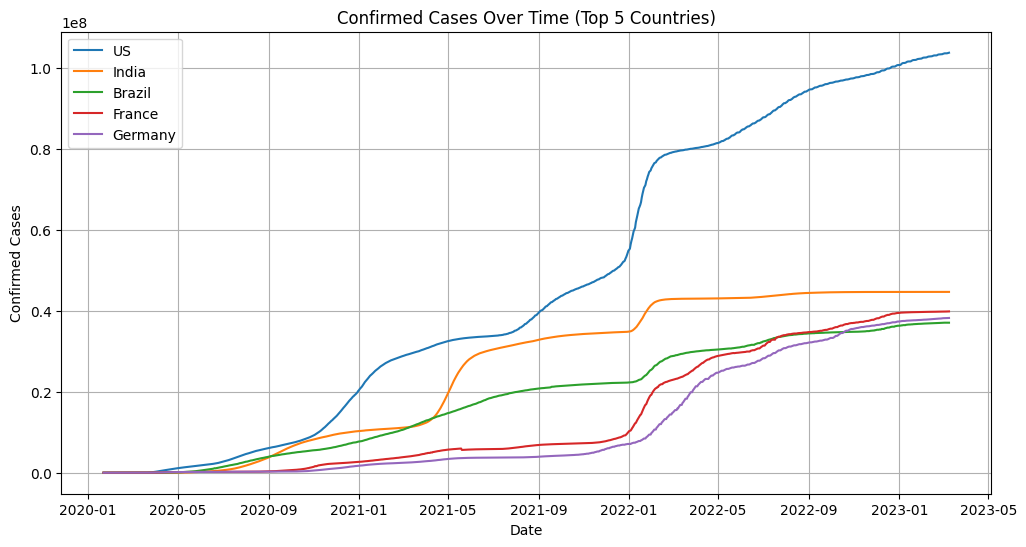

In [23]:
# Country-wise Trends Over Time
import matplotlib.pyplot as plt

# Top 5 countries with most confirmed cases
top5 = merged_df.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(5).index

# Filter data
country_data = merged_df[merged_df['Country/Region'].isin(top5)]

# Plot
plt.figure(figsize=(12, 6))
for country in top5:
    country_total = country_data[country_data['Country/Region'] == country].groupby('Date')['Confirmed'].sum()
    plt.plot(country_total.index, country_total.values, label=country)

plt.legend()
plt.title("Confirmed Cases Over Time (Top 5 Countries)")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.grid(True)
plt.show()


In [24]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
!pip install nbformat



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
# Interactive Dashboards using Plotly
import plotly.express as px

# Latest data
latest = merged_df[merged_df['Date'] == merged_df['Date'].max()]

# Group by country
country_summary = latest.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

# Interactive bar chart
fig = px.bar(country_summary.sort_values('Confirmed', ascending=False).head(10),
             x='Country/Region', y='Confirmed', 
             hover_data=['Deaths', 'Recovered'], color='Confirmed',
             title='Top 10 Countries by Confirmed Cases')
fig.show()


In [27]:
pip install nbformat --upgrade


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
# Mapping Data on a 🌍 World Map (Choropleth)
# Confirmed Cases Map
fig = px.choropleth(country_summary, 
                    locations="Country/Region",
                    locationmode='country names',
                    color="Confirmed",
                    hover_name="Country/Region",
                    color_continuous_scale="Reds",
                    title="Global COVID-19 Confirmed Cases Map")
fig.show()


In [29]:
# 💀 Death Cases Map
fig = px.choropleth(country_summary, 
                    locations="Country/Region",
                    locationmode='country names',
                    color="Deaths",
                    hover_name="Country/Region",
                    color_continuous_scale="Oranges",
                    title="Global COVID-19 Deaths Map")
fig.show()


In [30]:
# Interactive Line Plot for a Country
# Filter a specific country
pakistan = merged_df[merged_df['Country/Region'] == 'Pakistan']

fig = px.line(pakistan.groupby('Date').sum().reset_index(), 
              x='Date', y=['Confirmed', 'Deaths', 'Recovered'],
              title='COVID-19 Trend in Pakistan')
fig.show()
